# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024
* Fernando Falkenberg INPE 09 Oct 2025

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to the files, which are sparc4-pipeline products.

In [2]:
path = '/media/fernando/KINGSTON/Doutorado/2025/reduced/'
date = '20250707'
object = 'V462Lup'
channel = '4'

In [3]:
db_example = f'{path}{date}/sparc4acs{channel}/{date}_sparc4acs{channel}_db.csv'
# Esse arquivo é uma tabela que contém informações de todas as imagens daquela noite, naquele canal, por exemplo, diretório, tempo de exposição, posição da lâmina, etc.

phot_lightcurve_example =f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_S+N_lc.fits'
# Esse arquivo contém várias tabelas dentro dele, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela, estão informações de cada uma das fontes detectadas pelo pipeline, para cada imagem daquele objeto, por exemplo, RA, Dec, magnitude (com seu erro), fwhm, etc.

polar_stack_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_stack.fits'
# Esse arquivo contém várias tabelas dentro dele, duas para cada abertura em que os dados do objeto foram processados (sendo uma para o feixe ordinário e a outra para o feixe extraordinário). Cada tabela contém uma linha para cada fonte identificada pelo pipeline. Para cada linha, existem informações como RA, Dec, magnitude (com seu erro), fwhm, etc. É uma versão do arquivo logo acima, só que para apenas uma imagem stack.

polar_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_polar.fits'
# Esse arquivo contém várias tabelas, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela existe uma linha para cada fonte detectada pelo pipeline. Em cada linha estão os resultados da polarimetria para aquela fonte, por exemplo, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... Além disso, também estão as contagens para cada posição de lâmina, para cada fonte, para cada imagem, com seus erros. É nesse arquivo que estão os dados importantes.

polar_time_series_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_ts.fits'
# Esse arquivo contém uma tabela com os dados da série temporal polarimétrica das fontes detectadas pelo pipeline, por exemplo, RA, Dec, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... O resultado aqui é para cada conjunto de uma medida polarimétrica.

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipeline` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [4]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:22.997000,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
1,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:24.417063,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
2,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:25.837126,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
3,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:27.257189,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
4,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-07T22:44:28.677251,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L2,CLEAR,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:42:04.092000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,12,L4,CLEAR,True
3962,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:42:36.710000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,13,L4,CLEAR,True
3963,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:43:09.411000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,14,L4,CLEAR,True
3964,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-08T08:43:42.232000,30.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,15,L4,CLEAR,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [5]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs4/20250707_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   4R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   4R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   4R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   4R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   4R x 13C   [I11, D25.17, D25.1

Then we plot the science frame using the `sparc4.product_plots` library

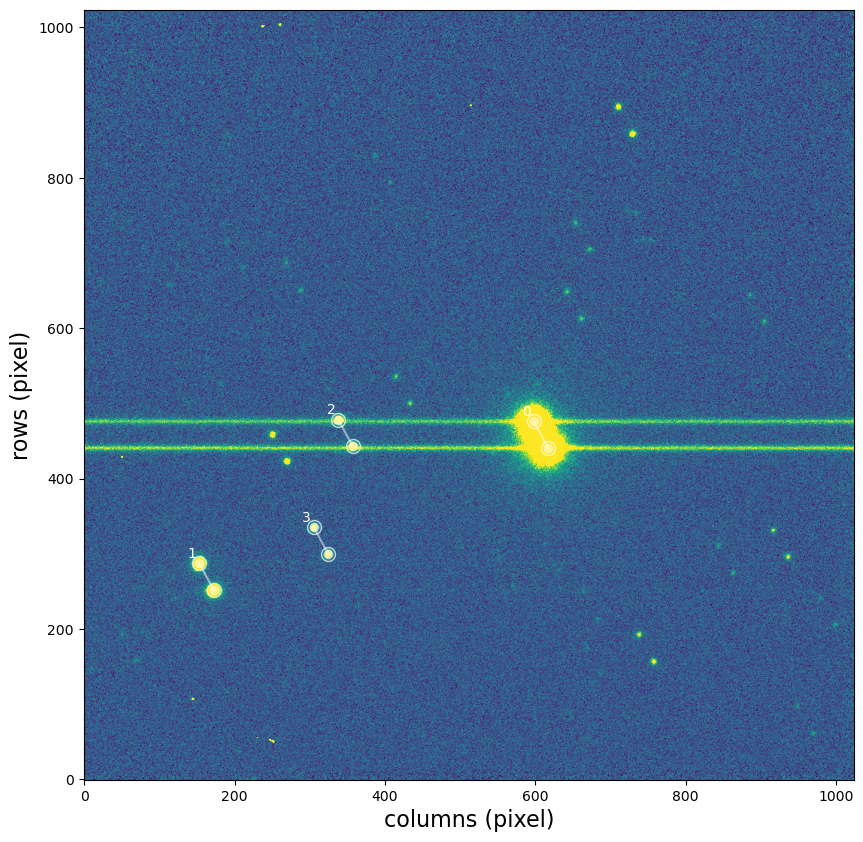

In [6]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [7]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,227.002915,-40.144880,616.959372,441.020303,6.154167,6.154167,-16.690666,0.002543,-10.446289,0.036309,10,0
1,1,227.057848,-40.162734,172.534207,251.634849,6.248166,6.248166,-12.931701,0.020989,-9.882492,0.035587,10,0
2,2,227.035146,-40.144690,357.235080,442.954485,6.032608,6.032608,-11.423165,0.068821,-9.984326,0.036242,10,0
3,3,227.039119,-40.158240,324.587671,299.793562,5.793058,5.793058,-10.720165,0.125504,-9.871599,0.034989,10,0


Below we select the source with its index number assigned as the main target to be analyzed. Then we select other stars as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

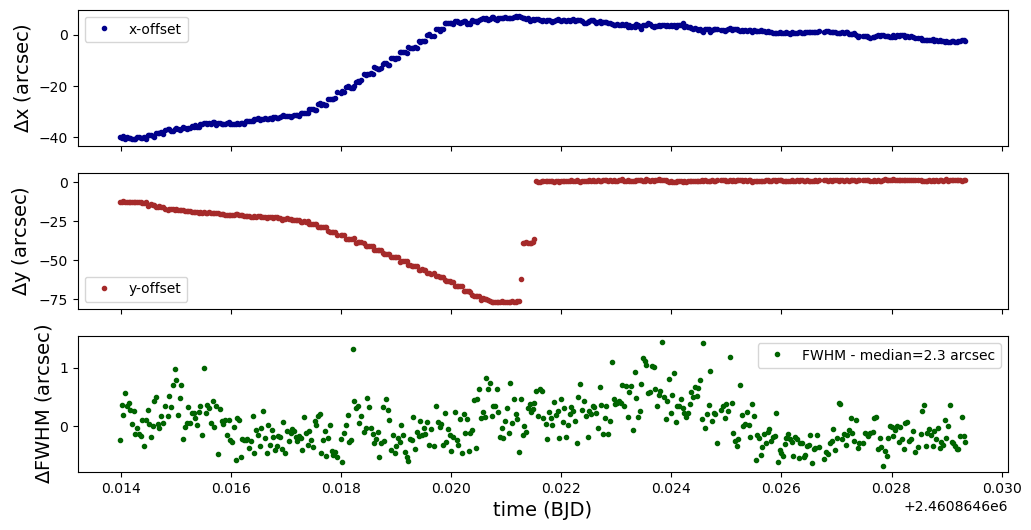

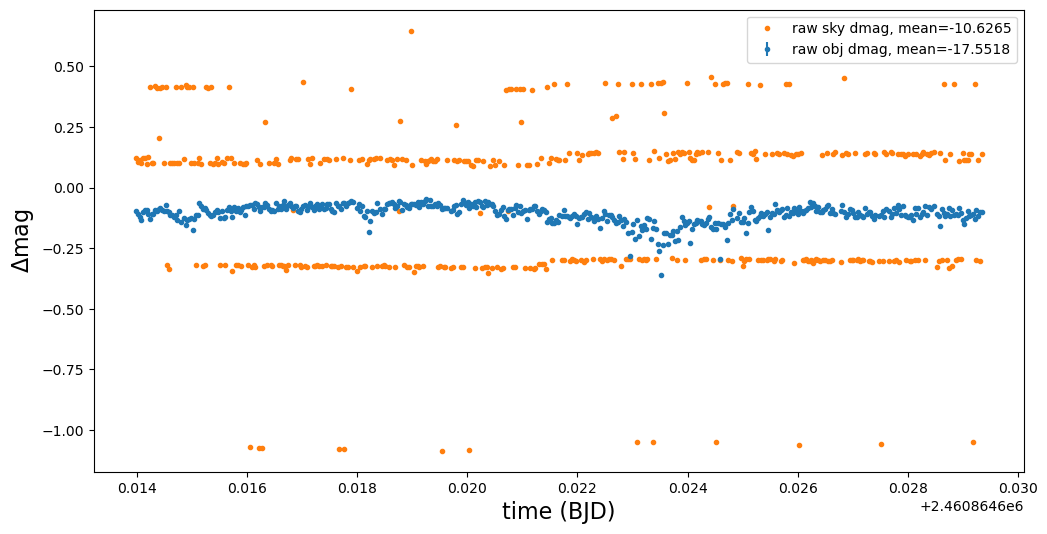

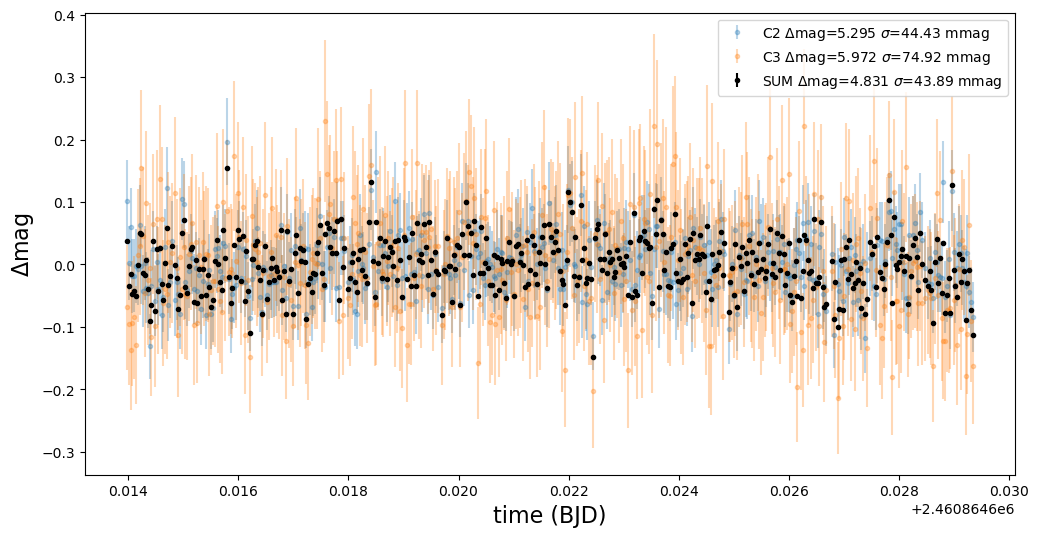

       TIME               x         ...       diffmagsum      
------------------ ---------------- ... ----------------------
2460864.6139831846 607.367741815389 ...    0.03826230568728306
2460864.6140157287 606.117741815389 ...  -0.034274140763725924
 2460864.614046456 608.867741815389 ...  -0.014646484778859659
2460864.6140767545 605.617741815389 ...  -0.046883147070028386
2460864.6141080833 607.117741815389 ...   -0.04308368375669325
2460864.6141416687 606.367741815389 ...   -0.04989761575428098
   2460864.6141725 606.367741815389 ... -0.0012638964340272452
               ...              ... ...                    ...
2460864.6291520577 718.367741815389 ...   0.008721903773343698
 2460864.629183016 718.117741815389 ...   -0.01073400908946276
2460864.6292139976 719.367741815389 ...   -0.08889232063345176
 2460864.629245569 719.117741815389 ...  -0.030010728517959606
2460864.6292767245 719.617741815389 ...  -0.009475218345361469
2460864.6293085394 720.367741815389 ...    -0.072574355

In [8]:
catalog = 'CATALOG_PHOT_AP010'
target=0
comps=[2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [9]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs4/20250707_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    2907   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   3922   4R x 1955C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D

Below we print one of the catalog extensions

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0477,EFE0477,FO0478,EFO0478,FE0478,EFE0478,FO0479,EFO0479,FE0479,EFE0479
0,2.0,10.0,0.0,227.002915,-40.144880,597.776111,476.361942,616.959372,441.020303,4.792792,...,5.621807e+06,12228.457836,4.755602e+06,11312.662598,5.738709e+06,12346.033770,4.767720e+06,11329.282733,5.724145e+06,12338.210839
1,2.0,10.0,1.0,227.057848,-40.162734,153.047059,287.215848,172.534207,251.634849,4.987853,...,1.705084e+05,3530.766672,1.496446e+05,3455.226459,1.784751e+05,3555.687255,1.491800e+05,3473.217312,1.741254e+05,3561.723969
2,2.0,10.0,2.0,227.035146,-40.144690,337.925769,478.369569,357.235080,442.954485,5.772424,...,4.140516e+04,3065.255899,3.939196e+04,3070.772321,4.517851e+04,3094.209856,3.768780e+04,3100.442193,4.868222e+04,3130.630271
3,2.0,10.0,3.0,227.039119,-40.158240,305.358344,335.243056,324.587671,299.793562,6.042710,...,2.287861e+04,2945.685925,1.787092e+04,2948.167128,2.869153e+04,2981.209870,2.189129e+04,2987.289582,2.790998e+04,3014.380204


Then we can print all column names to check the data available in each catalog

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0477', 'EFE0477', 'FO0478', 'EFO0478', 'FE0478', 'EFE0478', 'FO0479',
       'EFO0479', 'FE0479', 'EFE0479'],
      dtype='object', length=1955)

Finally, we can select the source of interest and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-10-09 17:07:18,620 astropop - INFO - Normalization disabled.  [__init__]


2025-10-09 17:07:18,620 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-10-09 17:07:18,642 root - INFO - Source index: i=0   [pipeline_lib]


2025-10-09 17:07:18,642 | INFO | Source index: i=0 


2025-10-09 17:07:18,643 root - INFO - Source RA=227.00291530294842 Dec=-40.144879874293906 mag=-24.31060+-0.00008  [pipeline_lib]


2025-10-09 17:07:18,643 | INFO | Source RA=227.00291530294842 Dec=-40.144879874293906 mag=-24.31060+-0.00008


2025-10-09 17:07:18,644 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-10-09 17:07:18,644 | INFO | Best aperture radius: 15.0 pixels


2025-10-09 17:07:18,649 root - INFO - Polarization in Q: 0.0003+-0.0002  [pipeline_lib]


2025-10-09 17:07:18,649 | INFO | Polarization in Q: 0.0003+-0.0002


2025-10-09 17:07:18,650 root - INFO - Polarization in U: -0.0005+-0.0004  [pipeline_lib]


2025-10-09 17:07:18,650 | INFO | Polarization in U: -0.0005+-0.0004


2025-10-09 17:07:18,655 root - INFO - Polarization in V: -0.0004+-0.0002  [pipeline_lib]


2025-10-09 17:07:18,655 | INFO | Polarization in V: -0.0004+-0.0002


2025-10-09 17:07:18,658 root - INFO - Total linear polarization p: 0.0006+-0.0004  [pipeline_lib]


2025-10-09 17:07:18,658 | INFO | Total linear polarization p: 0.0006+-0.0004


2025-10-09 17:07:18,660 root - INFO - Angle of polarization theta: 150+-20 deg  [pipeline_lib]


2025-10-09 17:07:18,660 | INFO | Angle of polarization theta: 150+-20 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-10-09 17:07:18,662 root - INFO - Free constant k: 0.8345449261442506+-0.0  [pipeline_lib]


2025-10-09 17:07:18,662 | INFO | Free constant k: 0.8345449261442506+-0.0


2025-10-09 17:07:18,665 root - INFO - Zero of polarization: 30.2+-0.0  [pipeline_lib]


2025-10-09 17:07:18,665 | INFO | Zero of polarization: 30.2+-0.0


2025-10-09 17:07:18,666 root - INFO - RMS of zi residuals: 0.0031202024688188703  [pipeline_lib]


2025-10-09 17:07:18,666 | INFO | RMS of zi residuals: 0.0031202024688188703


2025-10-09 17:07:18,667 root - INFO - Reduced chi-square (n=480.0, DOF=477.0): 3.72  [pipeline_lib]


2025-10-09 17:07:18,667 | INFO | Reduced chi-square (n=480.0, DOF=477.0): 3.72


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-10-09 17:07:18,765 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:07:18,765 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:07:18,771 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:07:18,771 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:07:19,004 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:07:19,004 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-09 17:07:19,011 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-09 17:07:19,011 | INFO | Substituting symbol \perp from STIXGeneral


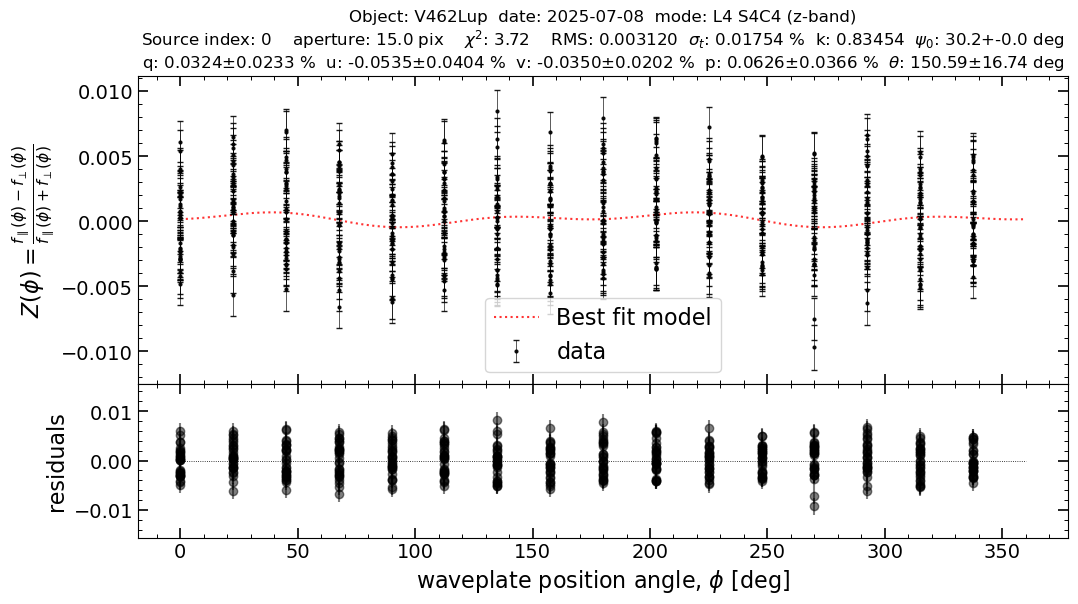

In [12]:
source_index = 0

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [13]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250707/sparc4acs4/20250707_s4c4_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
SOURCE_INDEX : 0
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 5
APERTURE_RADIUS : 15.0
NEXPS : 480
MAG : -24.31060+-0.00008
RA : 227.00291530294842
DEC : -40.144879874293906
FWHM : 4.792791881059897
X1 : 597.7761114619993
Y1 : 476.36194206722826
X2 : 616.9593721687786
Y2 : 441.02030266697255
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 18

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [14]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.06+-0.04 %  Angle of polarization: 150+-20 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [15]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [16]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

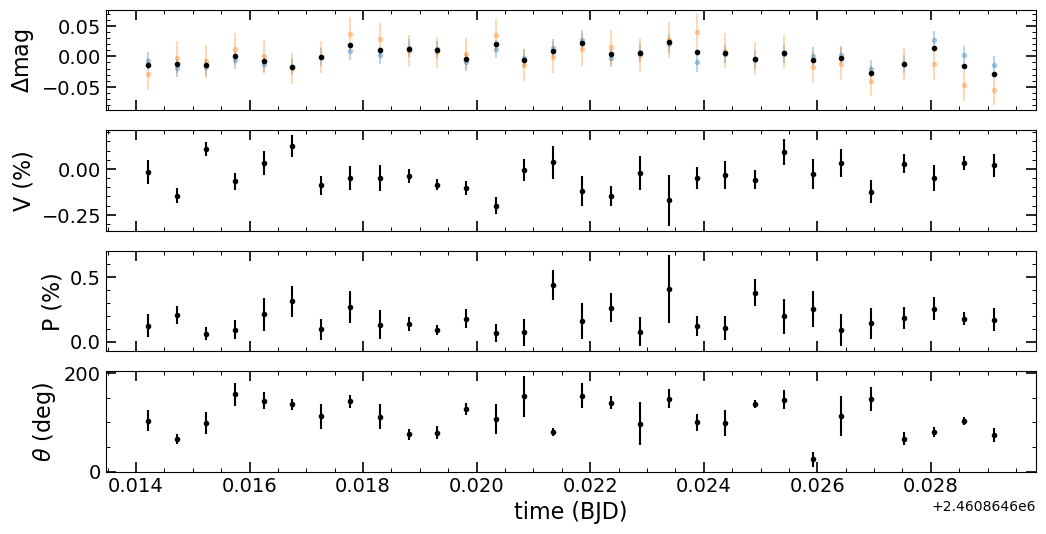

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.007194396018501692,0.014730682627403813,-0.029145202844375717,0.02595532069293779,2460864.6142177684,597.7761114619993,476.36194206722826,616.9593721687786,441.02030266697255,5.0345561420201195,-20.5589468030689,0.000434147723717888,-15.7438786030535,0.029837806796923303,-0.014696710345403652,0.001211111650782622,0.0008985416592702459,103.46020146364245,21.218763306027782
-0.01877891655789732,0.01471347552962605,-0.0020297916057447907,0.026860740872447254,2460864.6147299376,600.5261114619993,470.36194206722826,619.7093721687786,435.02030266697255,5.386934372948113,-20.545738438769238,0.0004370386467422984,-15.728734337519349,0.03062031607969079,-0.012760809110914373,0.0020398203923798065,0.0006848145599733389,65.8856615653902,9.601676936069532
-0.018051442027596565,0.014563280984694818,-0.008210646405165889,0.026463906036448426,2460864.6152405906,608.5261114619993,464.11194206722826,627.7093721687786,428.77030266697255,5.160625995430059,-20.557384791150515,0.00043444551581445456,-15.742043783824384,0.03020016539578422,-0.01442390303467267,0.0006120140808505514,0.0004884743820603688,98.24328343966847,22.826872394032375
-0.005739930598938514,0.014616688069816789,0.012277890128594038,0.02669651953085947,2460864.615747384,614.0261114619993,457.36194206722826,633.2093721687786,422.02030266697255,5.042371351278346,-20.56371483217189,0.000432994178863788,-15.733233804252308,0.030429866205325742,0.0007161175587784285,0.0009114248385086893,0.0007548276759683648,156.44242133142177,23.68606891163787
-0.012979286256273426,0.014282504077444472,0.0008581022735327792,0.025933902440831533,2460864.616253007,613.2761114619993,452.61194206722826,632.4593721687786,417.27030266697255,4.369714411006184,-20.581497735356283,0.00042907358326820243,-15.759700372691478,0.029600490034002284,-0.007967547695998611,0.0021290260540940296,0.0012777070468635609,143.25204432315863,17.16391467827661
-0.017106977870009032,0.014240993878985472,-0.019361923798157932,0.025503250334684733,2460864.616754338,617.7761114619993,449.61194206722826,636.9593721687786,414.27030266697255,4.295529650373972,-20.583091297374775,0.0004288535162450182,-15.771015444551377,0.02920366164743913,-0.017689057537405795,0.003102651056997039,0.0012139725960994133,136.52504336842014,11.190306486494578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0006727777818333891,0.014788947970633855,-0.017912797101823585,0.026082236428056838,2460864.6259212783,721.0261114619993,517.3619420672283,740.2093721687786,482.02030266697255,4.3118350947064785,-20.563951329706175,0.0004330646443816082,-15.739827794327041,0.029977007008618183,-0.005641374981670388,0.0025329401555289517,0.001388332013598506,24.883198335322575,15.675970670781775
0.003086242917433424,0.01463515061971302,-0.012461231632256542,0.02583143771900628,2460864.626417586,720.0261114619993,518.3619420672283,739.2093721687786,483.02030266697255,4.114904175224487,-20.57739489573919,0.00043012953517288936,-15.749787279371406,0.02968300499374231,-0.002157293993019671,0.0008657900239273559,0.001251685275564334,112.66968112787532,41.3474374753752


In [18]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=0, 
                             comps=[2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)